In [1]:
import tensorflow as tf
import numpy as np
from DP import DataLoader
import matplotlib.pyplot as plt
from tf_util_x import *
%matplotlib notebook

In [2]:
dYRD = DataLoader(data_name = "YRD200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dRH = DataLoader(data_name = "RH200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dFFBC = DataLoader(data_name = "FFBC200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dZIOP = DataLoader(data_name = "ZIOP200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dNYT = DataLoader(data_name = "NYT200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dARCH = DataLoader(data_name = "ARCH200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dBABA = DataLoader(data_name = "BABA200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

dW = DataLoader(data_name = "W200",mode = 'reg',p_day = 200,train_prob = 0.8)(p_type = "all")

In [3]:
class model_1:
    def __init__(self,**args):
        try:
            self.name = args["name"]
        except:
            self.name = "def_model1"
        self.X=tf.placeholder(shape=[None,200,200,15],dtype=tf.float32)
        self.Y=tf.placeholder(shape=[None,3],dtype=tf.float32)
        self.BNX=BN(self.X,name=self.name+"BNX")()
        
        self.W1=tf.get_variable(self.name+"W1",shape=[7,7,15,16],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z1=tf.nn.conv2d(self.BNX,self.W1,strides=[1,1,1,1],padding="VALID")
        self.b1=tf.get_variable(self.name+"b1",shape=[194,194,16],initializer=tf.zeros_initializer())
        self.A1=ACT_0(self.Z1+self.b1,name=self.name+"A1")()
        
        self.W2=tf.get_variable(self.name+"W2",shape=[13,13,16,17],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z2=tf.nn.conv2d(self.A1,self.W2,strides=[1,1,1,1],padding="VALID")
        self.b2=tf.get_variable(self.name+"b2",shape=[182,182,17],initializer=tf.zeros_initializer())
        self.A2=tf.nn.relu(self.Z2+self.b2)
        
        self.YSW1=YSW(self.A2,name=self.name+"YSW1",channels=17)()
        
        self.W3=tf.get_variable(self.name+"W3",shape=[9,9,17,17],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z3=tf.nn.conv2d(self.YSW1,self.W3,strides=[1,1,1,1],padding="VALID")
        self.b3=tf.get_variable(self.name+"b3",shape=[174,174,17],initializer=tf.zeros_initializer())
        self.A3=tf.nn.relu(self.Z3+self.b3)
        self.BNA3=BN(self.A3,name=self.name+"BNA3")()
        
        self.RES1=CONV_RES(self.BNA3,step=2,name=self.name+"RES1")()
        
        self.W4=tf.get_variable(self.name+"W4",shape=[7,7,17,20],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z4=tf.nn.conv2d(self.RES1,self.W4,strides=[1,1,1,1],padding="VALID")
        self.b4=tf.get_variable(self.name+"b4",shape=[168,168,20],initializer=tf.zeros_initializer())
        self.A4=ACT_0(self.Z4+self.b4,name=self.name+"A4")()
        
        self.P1=tf.nn.max_pool(self.A4,strides=[1,4,4,1],ksize=[1,4,4,1],padding="VALID")
        
        self.W5=tf.get_variable(self.name+"W5",shape=[5,5,20,25],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z5=tf.nn.conv2d(self.P1,self.W5,strides=[1,1,1,1],padding="VALID")
        self.b5=tf.get_variable(self.name+"b5",shape=[38,38,25],initializer=tf.zeros_initializer())
        self.A5=tf.nn.relu(self.Z5+self.b5)
        self.BNA5=BN(self.A5,name=self.name+"BNA5")()
        
        self.YSW2=YSW(self.BNA5,name=self.name+"YSW2",channels=28)()
        
        self.RES2=CONV_RES(self.YSW2,step=2,name=self.name+"RES2")()
        
        self.W6=tf.get_variable(self.name+"W6",shape=[5,5,28,30],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z6=tf.nn.conv2d(self.RES2,self.W6,strides=[1,1,1,1],padding="VALID")
        self.b6=tf.get_variable(self.name+"b6",shape=[34,34,30],initializer=tf.zeros_initializer())
        self.A6=ACT_0(self.Z6+self.b6,name=self.name+"A6")()
        self.BNA6=BN(self.A6,name=self.name+"BNA6")()
        
        self.GOOG1=GOOG(self.BNA6,name=self.name+"GOOG1",channels=10)()
        
        self.P2=tf.nn.avg_pool(self.GOOG1,strides=[1,2,2,1],ksize=[1,2,2,1],padding="VALID")
        
        self.PH=tf.nn.max_pool(self.A2,strides=[1,14,14,1],ksize=[1,14,14,1],padding="VALID")
        
        self.W7=tf.get_variable(self.name+"W7",shape=[5,5,40,40],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z7=tf.nn.conv2d(self.P2,self.W7,strides=[1,1,1,1],padding="VALID")
        self.A7=tf.nn.relu(self.Z7)
        
        self.W8=tf.get_variable(self.name+"W8",shape=[1,1,40,17],initializer=tf.contrib.layers.xavier_initializer_conv2d())
        self.Z8=tf.nn.conv2d(self.A7,self.W8,strides=[1,1,1,1],padding="VALID")
        self.A8=tf.nn.relu(self.Z8+self.PH)
        self.BNA8=BN(self.A8,name=self.name+"BNA8")()
        
        self.YSW3=YSW(self.BNA8,name=self.name+"YSW3")()
        
        self.F=tf.contrib.layers.flatten(self.YSW3)
        self.WF=tf.get_variable(self.name+"WF",shape=[169,3],initializer=tf.contrib.layers.xavier_initializer())
        self.Z9=tf.matmul(self.F,self.WF)
        self.b9=tf.get_variable(self.name+"b9",shape=[1,3],initializer=tf.zeros_initializer())
        self.OUP=ACT_0(self.Z9+self.b9,name=self.name+"OUP")()
        
        self.cost=tf.reduce_mean(tf.squared_difference(100*self.Y,100*self.OUP))
        self.opt=tf.train.AdadeltaOptimizer(30).minimize(self.cost)
        self.init=tf.global_variables_initializer()
    def open(self,init=True):
        self.sess=tf.Session()
        if init:
            self.sess.run(self.init)
    def close(self,reset=True):
        self.sess.close()
        tf.reset_default_graph()
    def train(self,X,Y,bsize=4,bloop=2,loop=100):
        loss = []
        L = len(X)
        fig=plt.figure()
        ax=fig.add_subplot(111)
        plt.ion()
        fig.show()
        fig.canvas.draw()
        for i in range(loop):
            X_=np.stack(X[i:i+bsize])
            Y_=np.stack(Y[i:i+bsize])
            _,cost=self.sess.run([self.opt,self.cost],feed_dict={self.X:X_,self.Y:Y_})
            loss.append(cost)
            if len(loss)>30:
                loss = loss[1:]
            ax.clear()
            ax.plot(loss)
            fig.canvas.draw()
    def save(self,name="model_1"):
        sv=tf.train.Saver()
        sv.save(self.sess,name)
    def load(self,name="model_1"):
        sv=tf.train.Saver()
        sv.restore(self.sess,name)

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
tf.reset_default_graph()
m1 = model_1()

In [6]:
from functools import reduce
def count_params():
    "print number of trainable variables"
    size = lambda v: reduce(lambda x, y: x*y, v.get_shape().as_list())
    n = sum(size(v) for v in tf.trainable_variables())
    print ("Model size: %dK" % (n/1000,))
    return n

In [7]:
kk = count_params()

Model size: 9002K


In [8]:
m1.open()

In [449]:
m1.close()

In [9]:
X,Y = dNYT["X_tr"],dNYT["Y_tr"]

<IPython.core.display.Javascript object>


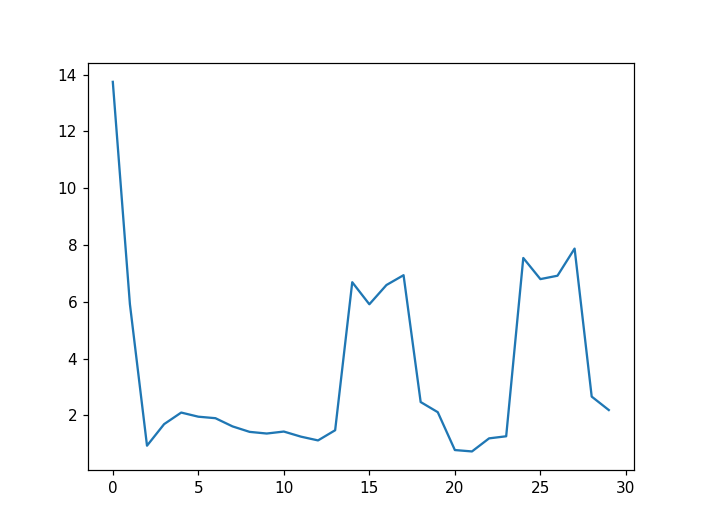

In [30]:
# for i in range(20):
m1.train(X,Y,bsize=4,loop=300)

In [624]:
m1a1 = m1.sess.run(m1.A4,feed_dict={m1.X:X[13].reshape(1,200,200,15)})

In [636]:
plt.imshow(m1a1[0,:,:,i:i+3])
i=i+1

In [633]:
i = 0

In [31]:
{None:3}

{None: 3}

In [33]:
np.random.choice([1,2,3,5,6,7],size=3).tolist()

[1, 3, 2]

<IPython.core.display.Javascript object>


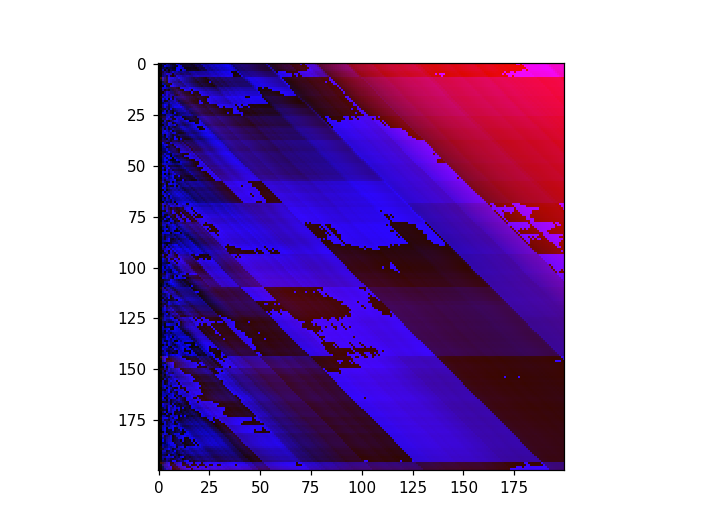

0


In [103]:
plt.imshow(a[0,:,:,i:i+3])
i = (i+1)%12
print(i)